<a href="https://colab.research.google.com/github/bdew70/data-science-mle/blob/main/Boston_house_price_predictions_Full_Code_Dewey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
# import libraries for data manipulation
import numpy
import pandas

# import libraries for data visualization
import matplotlib.pyplot as pyplot
import seaborn

from google.colab import drive

### Loading the dataset

In [2]:
# read the data from my personal Google Drive as a Pandas Df
drive.mount("/content/gdrive", force_remount=True)
boston_housing_df = pandas.read_csv('gdrive/My Drive/Colab Notebooks/Datasets/Boston.csv')

# Print the first 5 rows, including column headers
boston_housing_df.head()

Mounted at /content/gdrive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [3]:
print("Number of cols = " + str(len(boston_housing_df.columns)) + ", and number of rows = " + str(len(boston_housing_df.index)))
boston_housing_df.info()

Number of cols = 13, and number of rows = 506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

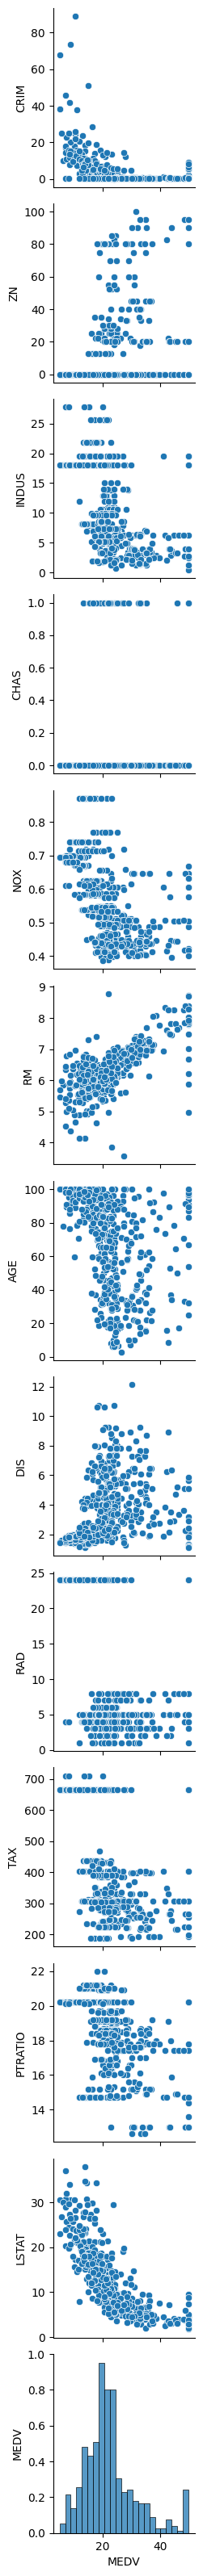

In [4]:
# seaborn.scatterplot(data=boston_housing_df, x="MEDV", y="tip")
seaborn.pairplot(boston_housing_df, x_vars=["MEDV"])

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
LSTAT    0.455621 -0.412995 

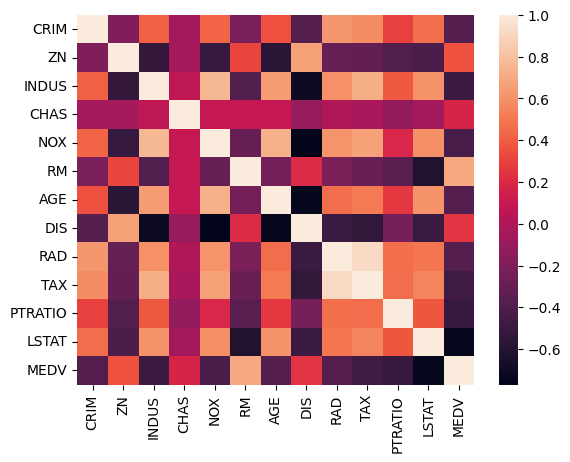

In [5]:
# Print columns that pandas selected as ideal for correlation
print(boston_housing_df.corr())

# plotting correlation heatmap
# dataplot = seaborn.heatmap(boston_housing_df.corr(), cmap="YlGnBu", annot=True)
dataplot = seaborn.heatmap(boston_housing_df.corr())


# displaying correlation heatmap
pyplot.show()

## Can also calulate the correlation matrix via:
# correlation_matrix = boston_housing_df.select_dtypes('number').corr()

# plot the correlation heatmap
# seaborn.heatmap(correlation_matrix)

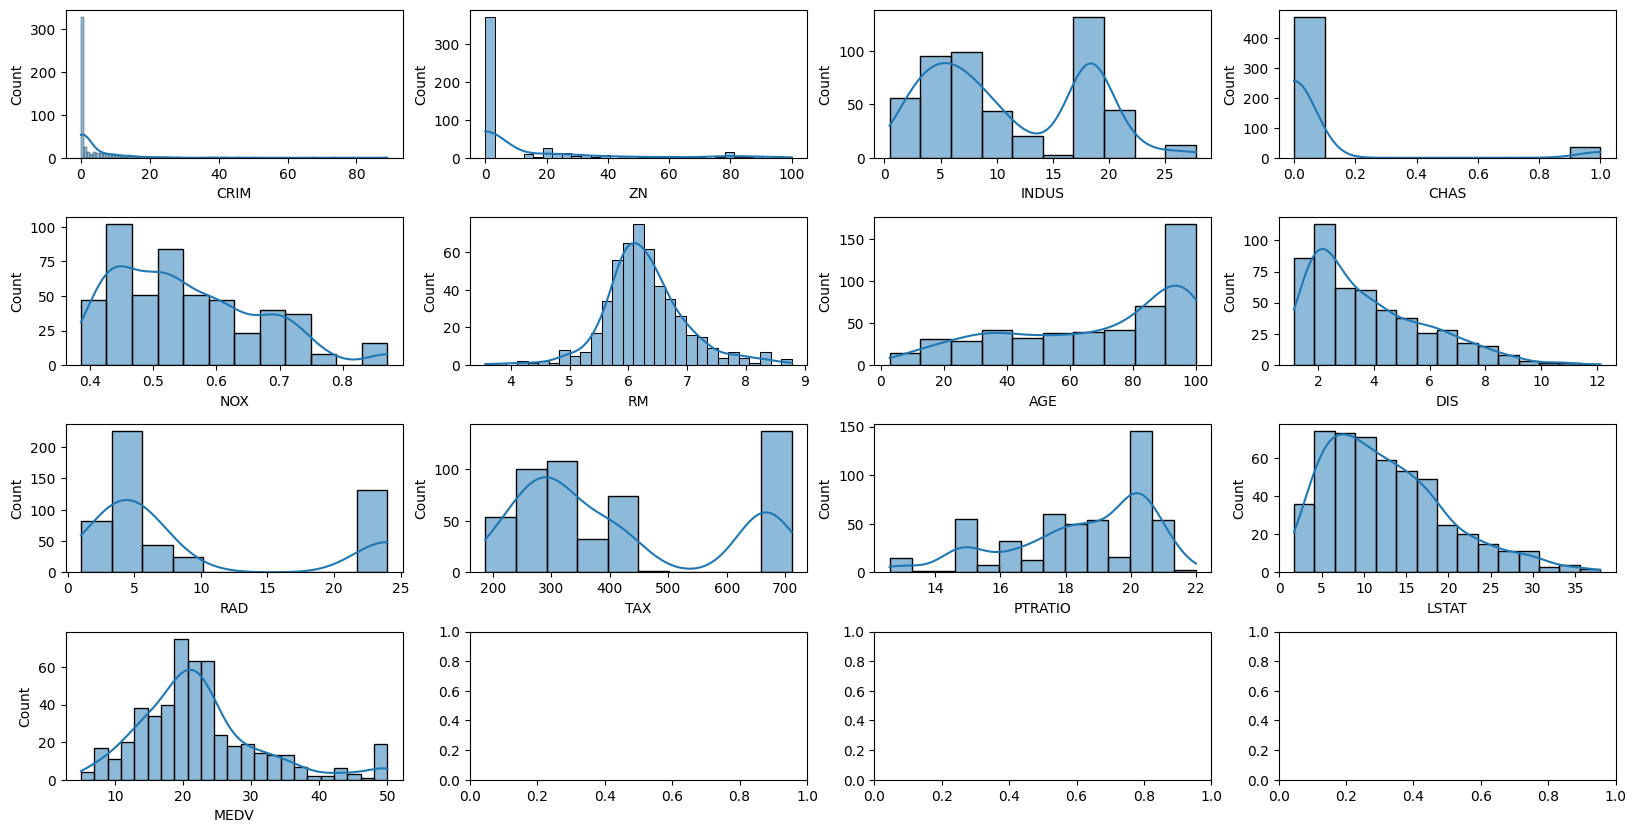

In [6]:

# 3. What are all the inferences that can be found by doing univariate analysis for different variables?
# for col in boston_housing_df.columns.tolist():
#   print("==== " + col + "====")
#   seaborn.histplot(boston_housing_df[col])

n_rows=4
n_cols=4
# Create the subplots
fig, axes = pyplot.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,10))
fig.subplots_adjust(hspace=0.4)

for i, column in enumerate(boston_housing_df.columns):
    seaborn.histplot(boston_housing_df[column],ax=axes[i//n_cols,i%n_cols], kde=True)

In [7]:
# 4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)\correlationd = {}
correlationd = {}
for idx, row in boston_housing_df.corr().iterrows():
   # print("idx: " + str(idx))
   # print(row)
   list_of_corr = []
   for series_item in row.items():
    # print("New series_item")
    # print(series_item)
    if (series_item[1] >= 0.7 or series_item[1] <= -0.7) and series_item[1] != 1.0:
      # print("Found greater than= 0.7 or less than= -0.7")
      list_of_corr.append(series_item)
   if len(list_of_corr) > 0:
     correlationd[idx] = list_of_corr

print(correlationd)


## Example "row"
# CRIM       1.000000
# ZN        -0.200469
# INDUS      0.406583
# CHAS      -0.055892
# NOX        0.420972
# RM        -0.219247
# AGE        0.352734
# DIS       -0.379670
# RAD        0.625505
# TAX        0.582764
# PTRATIO    0.289946
# LSTAT      0.455621
# MEDV      -0.388305
# Name: CRIM, dtype: float64

{'INDUS': [('NOX', 0.7636514469209139), ('DIS', -0.7080269887427675), ('TAX', 0.7207601799515422)], 'NOX': [('INDUS', 0.7636514469209139), ('AGE', 0.7314701037859592), ('DIS', -0.7692301132258282)], 'AGE': [('NOX', 0.7314701037859592), ('DIS', -0.747880540868632)], 'DIS': [('INDUS', -0.7080269887427675), ('NOX', -0.7692301132258282), ('AGE', -0.747880540868632)], 'RAD': [('TAX', 0.9102281885331865)], 'TAX': [('INDUS', 0.7207601799515422), ('RAD', 0.9102281885331865)], 'LSTAT': [('MEDV', -0.7376627261740145)], 'MEDV': [('LSTAT', -0.7376627261740145)]}


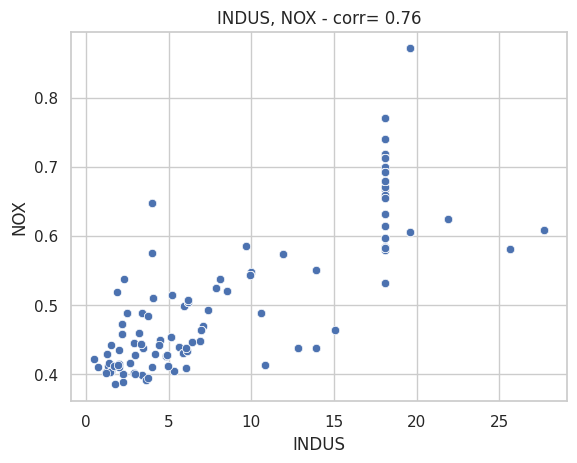

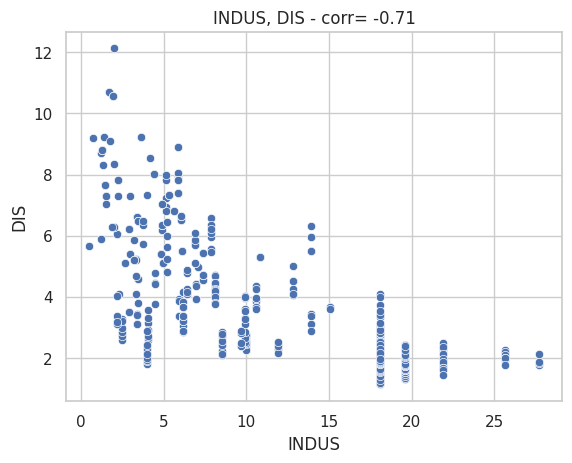

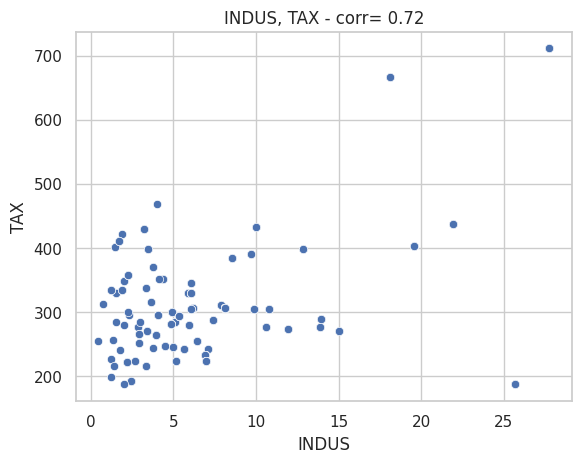

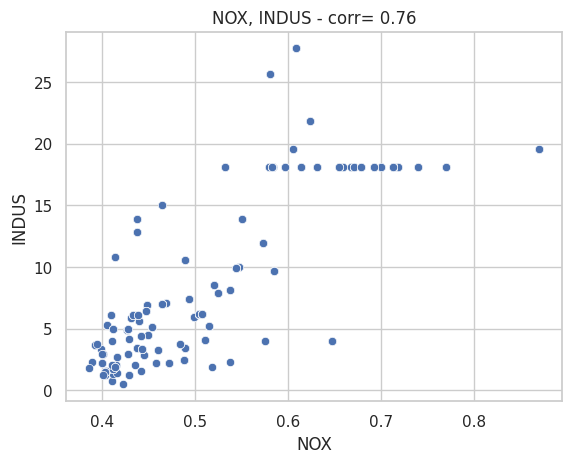

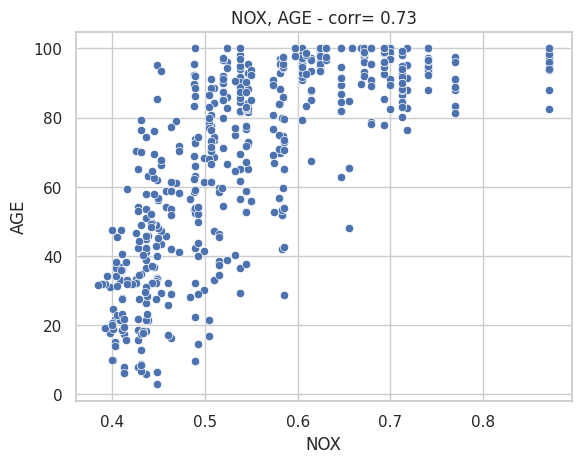

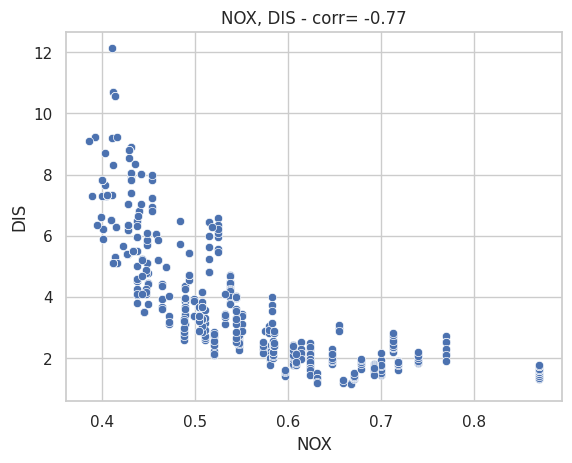

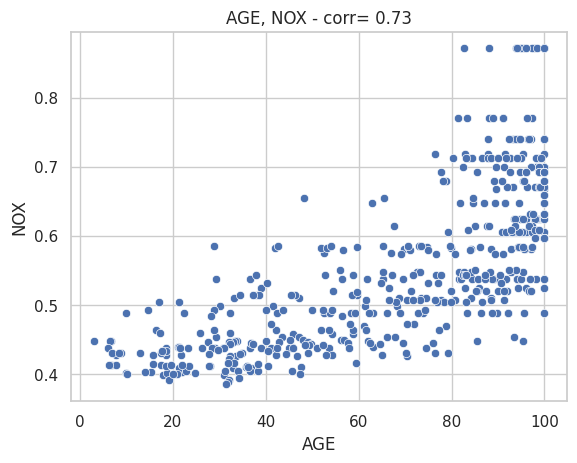

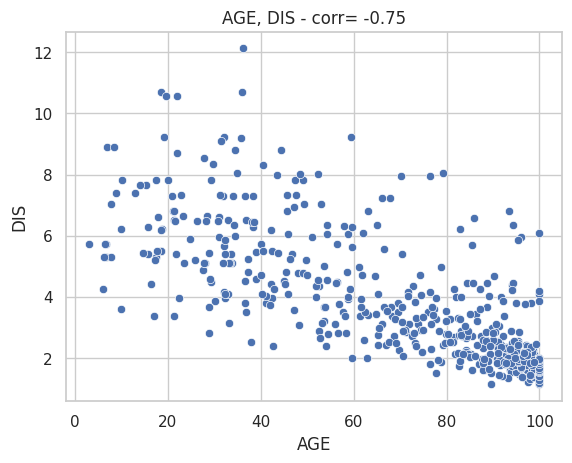

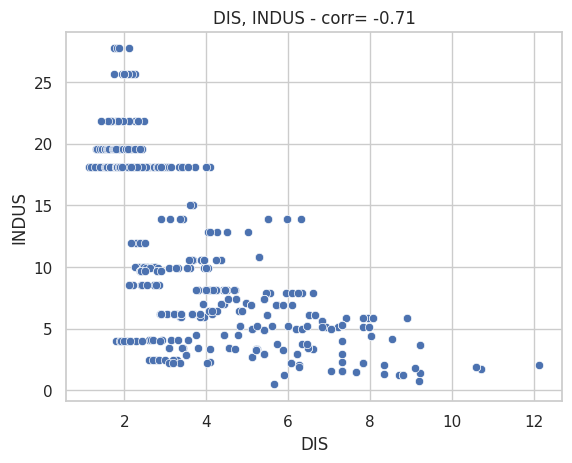

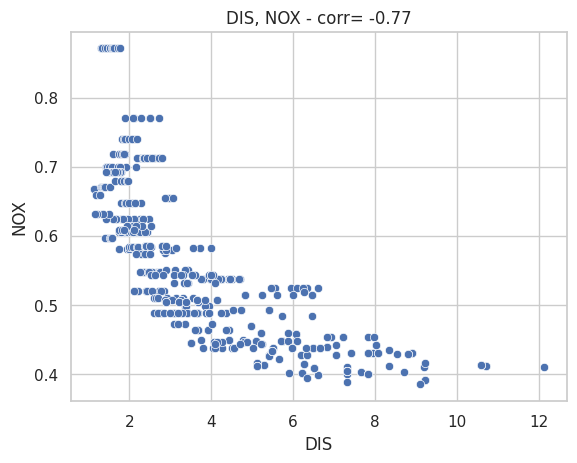

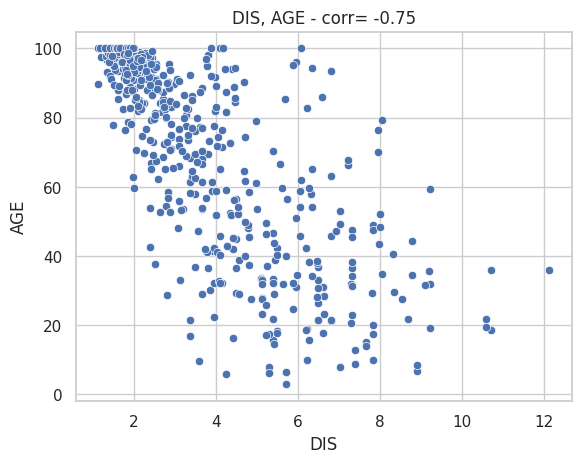

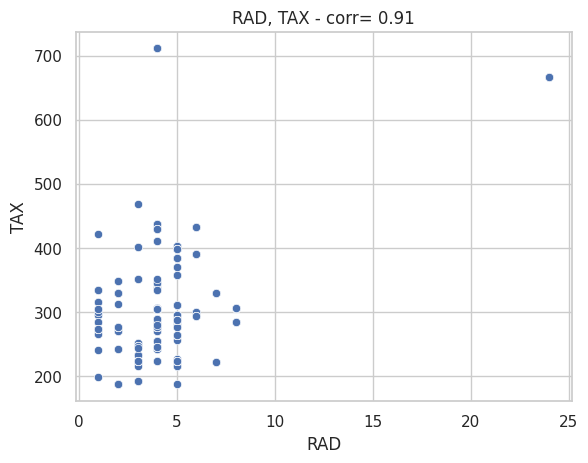

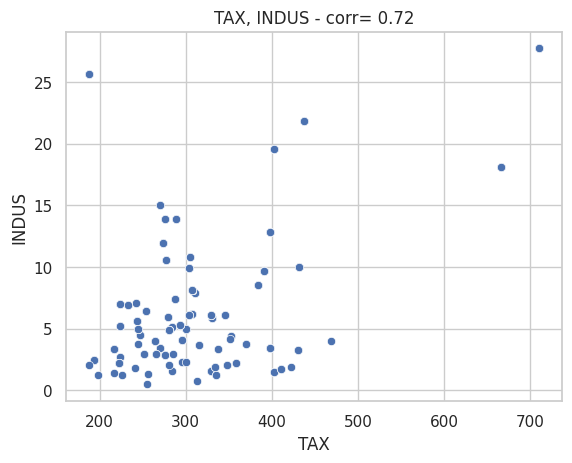

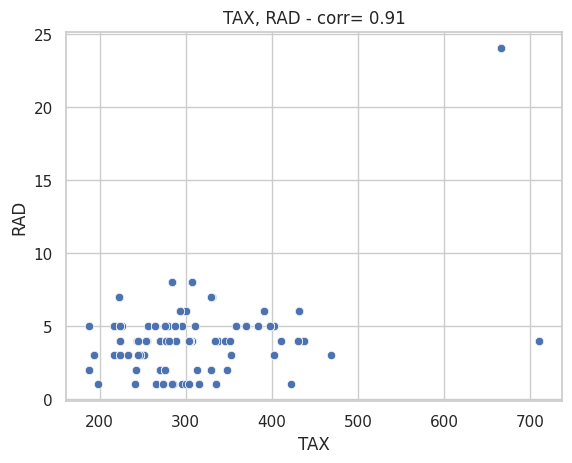

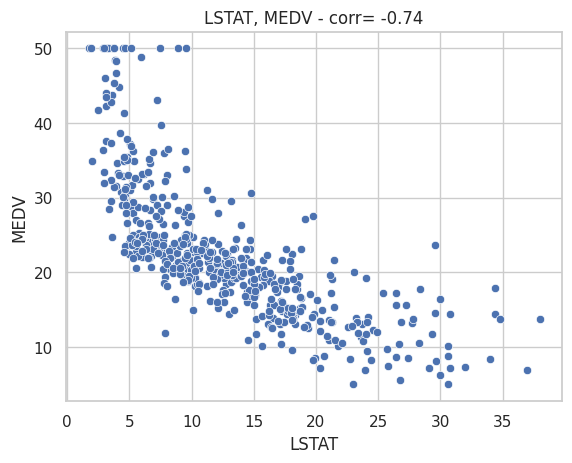

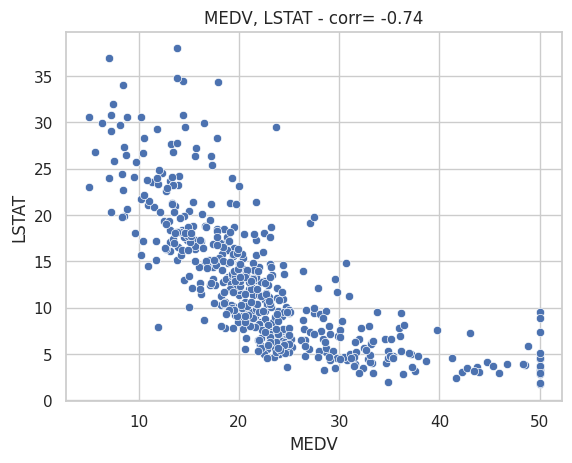

In [8]:
# TODO now do some seaborn on correlationd using the returned pairs
# iterate over each key
# then iterate over each item in the list
# for each item in the lest and key pair
# make a pair plot


# n_rows=8
# n_cols=3
# # Create the subplots
# fig, axes = pyplot.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,10))
# fig.subplots_adjust(hspace=0.4, wspace=0.5)

for item in correlationd.items():
  # print("## === " + item[0] + " ===")
  for corr in item[1]:
    # print(corr)
    seaborn.set(style='whitegrid')
    seaborn.scatterplot(data=boston_housing_df, x=item[0], y=corr[0]).set_title(item[0] + ", " + corr[0] + " - " + "corr= " + "{0:.2f}".format(corr[1]))
    # pyplot.text(3+0.2, 4.5, "corr="+str(corr[1]), horizontalalignment='left', size='medium', color='black', weight='semibold')
    pyplot.show()

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [10]:
# No missing values observed:
boston_housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [17]:

## Calculate skewed columns using the Fisher–Pearson standardized moment coefficient for all columns using Pandas. Skewness is a measure of asymmetry of a distribution.
## Here we are looking for any continuous variables, a variable that can take any value between its minimum and maximum value, aka continuous.
## If the continuous variable is skewed we will transform the data for better training. For example, if we have right skew of house prices,
## then without transformation our model will have a hard time prediciting future prices of higher priced houses.

## Steps
## 1. Get a list of all the columns
## 2. Calculate the skew using panda -> Pandas will calculate all the coefficients for us
## 3. If the coefficient is greater than xx then we can tranfsform using xx.

# Get a list of all the columns
df_col_names = boston_housing_df.dtypes[boston_housing_df.dtypes != "object"].index
print(df_col_names)

# Calculate the skew using pandas and then sort
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and —0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed
skew_calculations = boston_housing_df[df_col_names].skew().sort_values(ascending=False)
moderately_skewed = []
highly_skewed = []
print(skew_calculations)
for skew_calculation in skew_calculations.items():
  print(skew_calculation)
  if skew_calculation[1] >= -0.5 and skew_calculation[1] <= 0.5:
    print("Normal Distribution")
  elif (skew_calculation[1] >= -1.0 and skew_calculation[1] < -0.5) or (skew_calculation[1] > 0.5 and skew_calculation[1] <= 1.0):
    print("Moderately Skewed")
    moderately_skewed.append(skew_calculation)
  elif (skew_calculation[1] < -1.0 or skew_calculation[1] > 1.0):
    print("Highly Skewed")
    highly_skewed.append(skew_calculation)
  else:
    print("Error: Unknown Distributrion")

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')
CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
dtype: float64
('CRIM', 5.223148798243851)
Highly Skewed
('CHAS', 3.405904172058746)
Highly Skewed
('ZN', 2.2256663227354307)
Highly Skewed
('MEDV', 1.1080984082549072)
Highly Skewed
('DIS', 1.0117805793009007)
Highly Skewed
('RAD', 1.0048146482182057)
Highly Skewed
('LSTAT', 0.9064600935915367)
Moderately Skewed
('NOX', 0.7293079225348787)
Moderately Skewed
('TAX', 0.669955941795016)
Moderately Skewed
('RM', 0.40361213328874385)
Normal Distribution
('INDUS', 0.29502156787351164)
Normal Distribution
('AGE', -0.5989626398812962)
Moderately Skewed
('PTRATIO', -0.8023249268537809)
Moderately Skewed


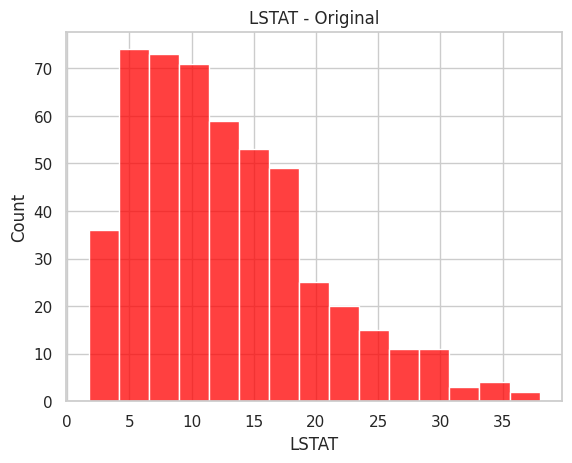

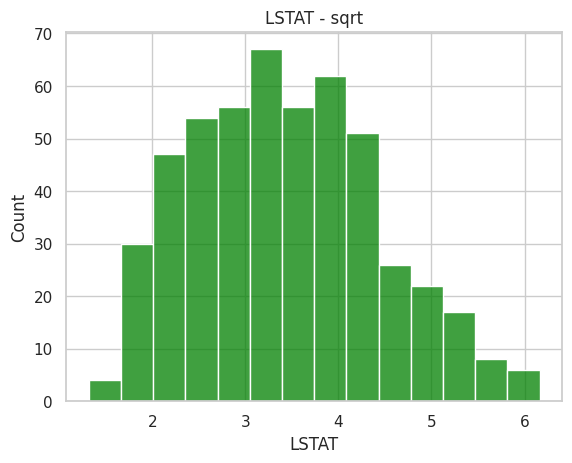

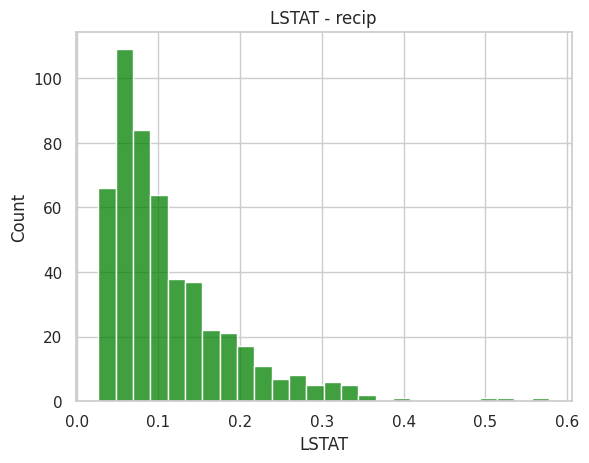

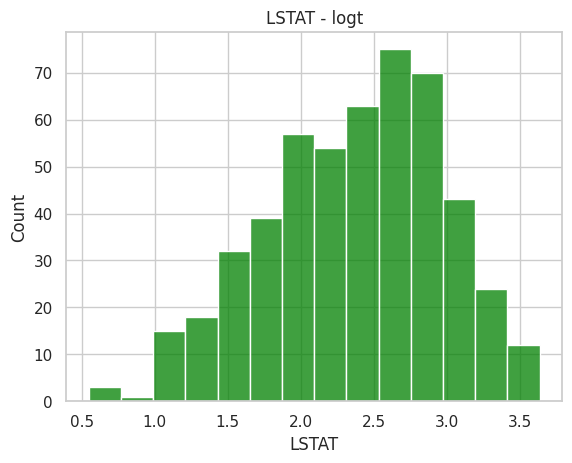

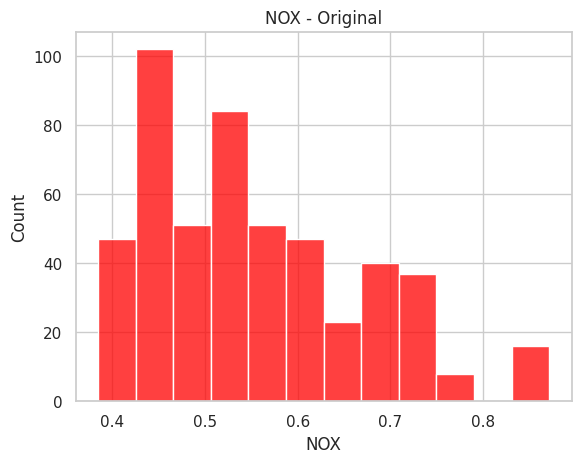

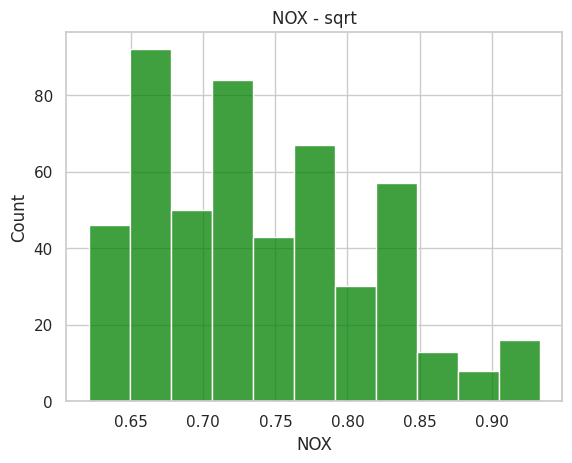

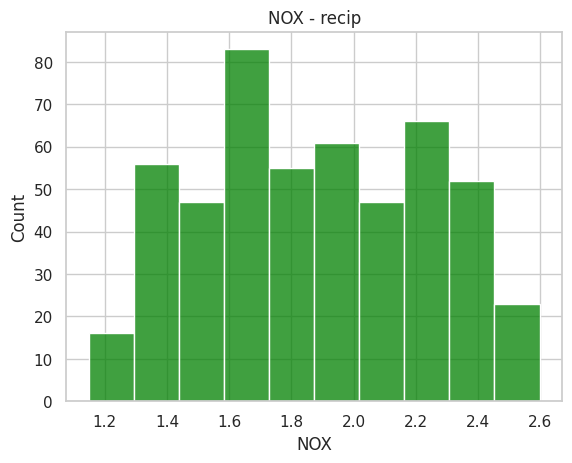

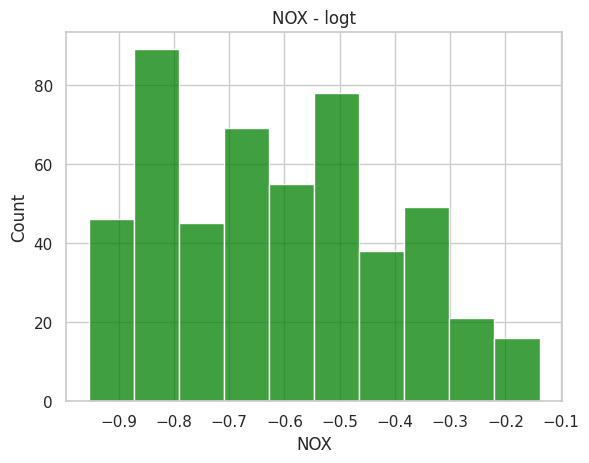

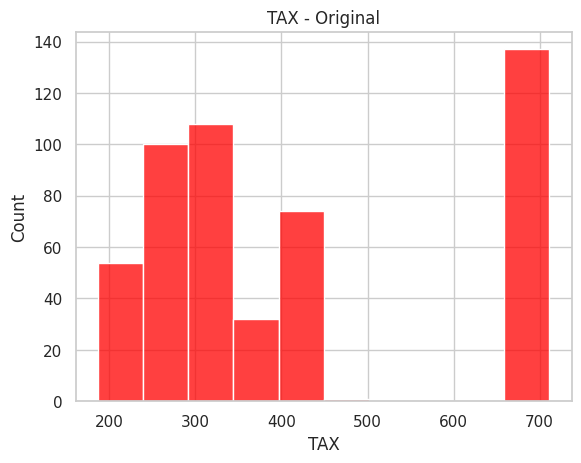

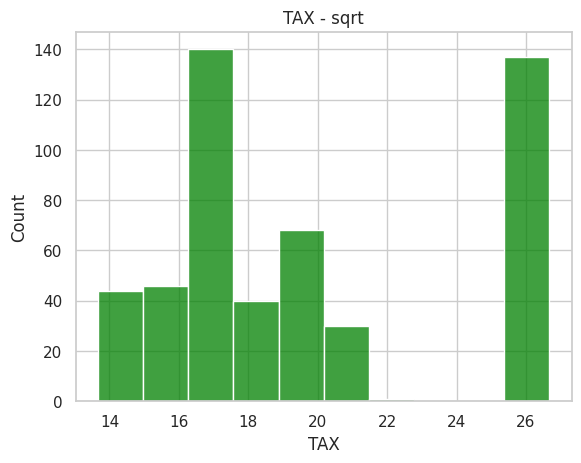

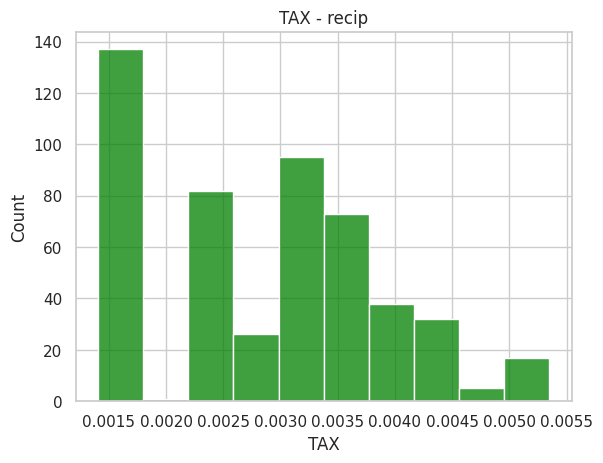

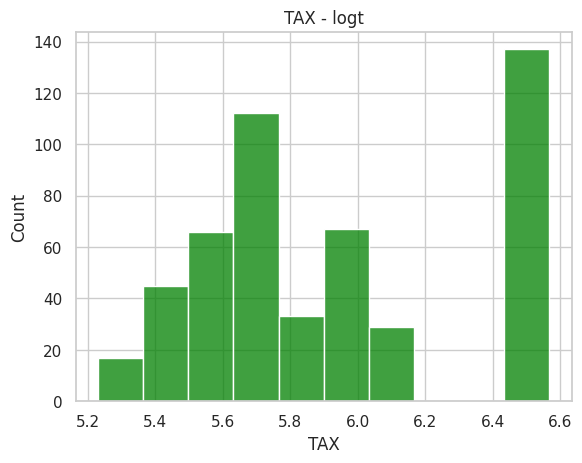

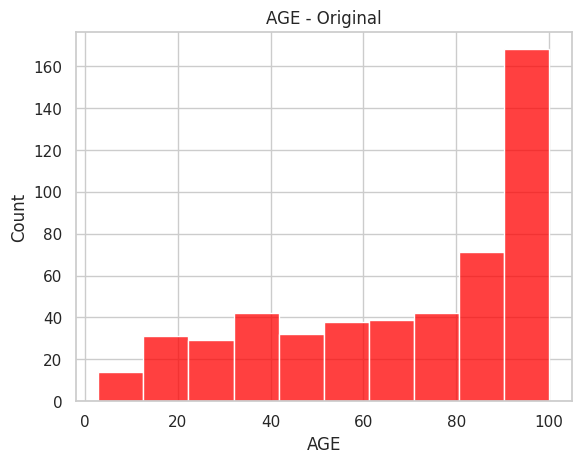

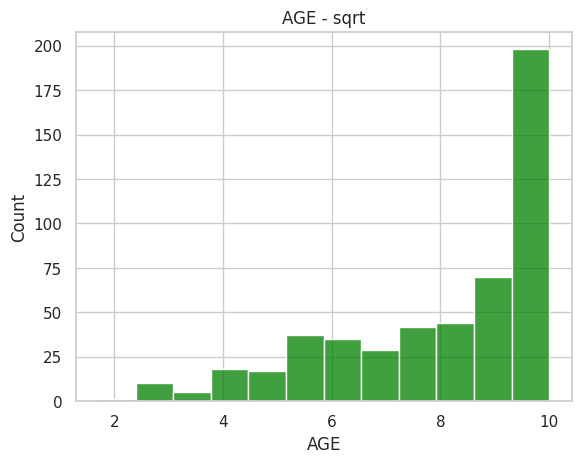

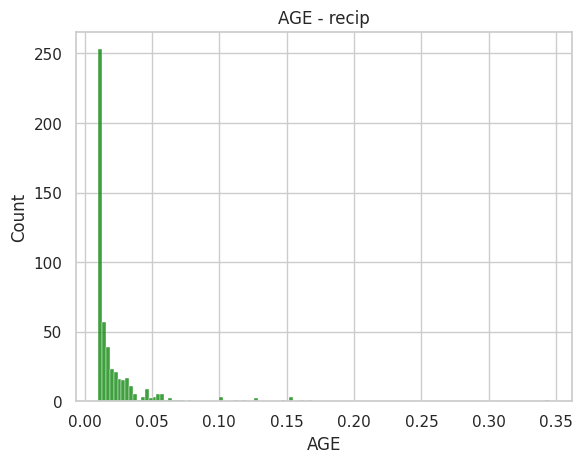

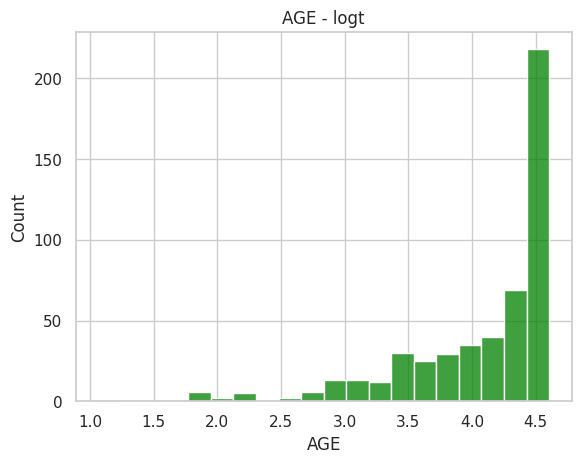

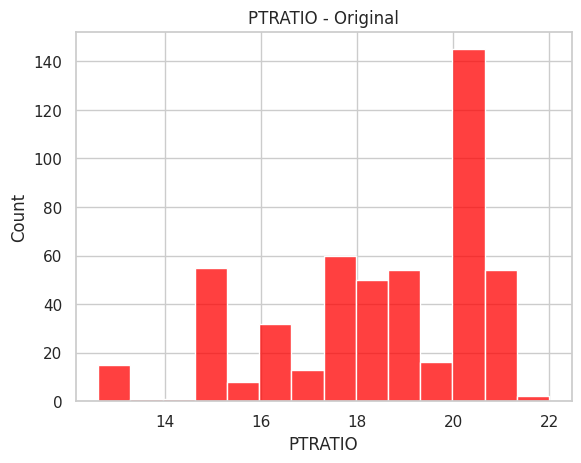

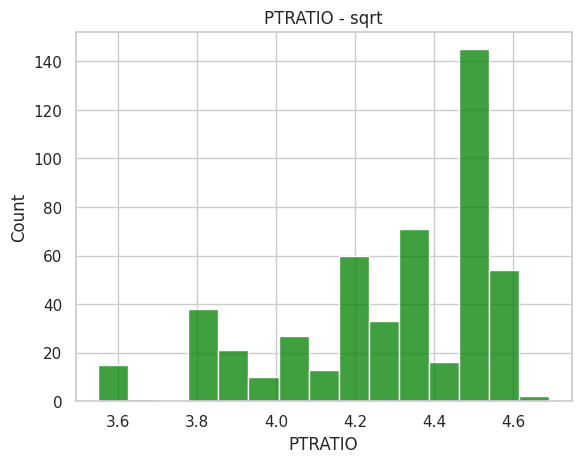

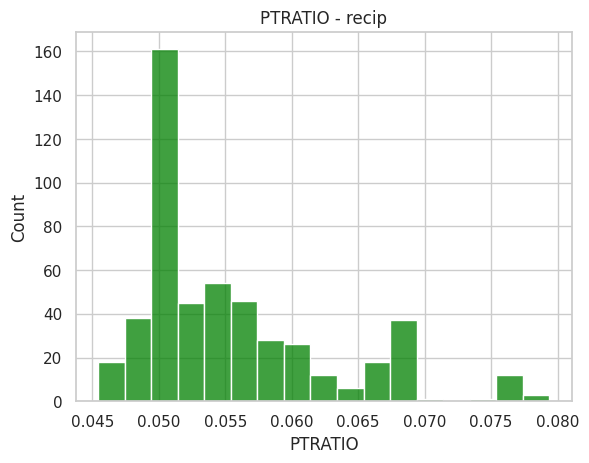

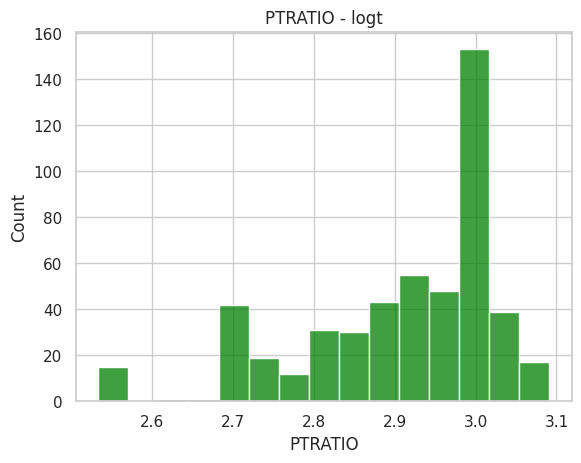

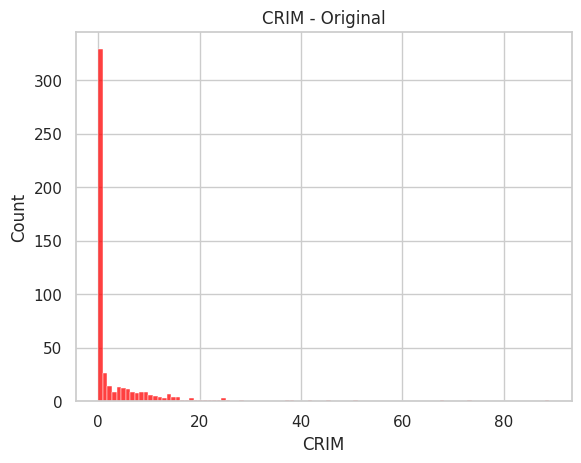

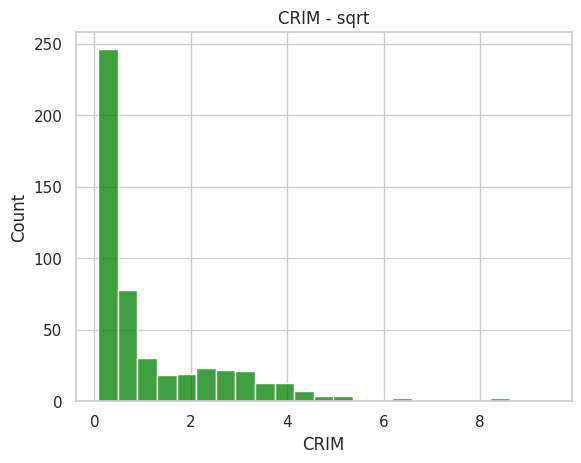

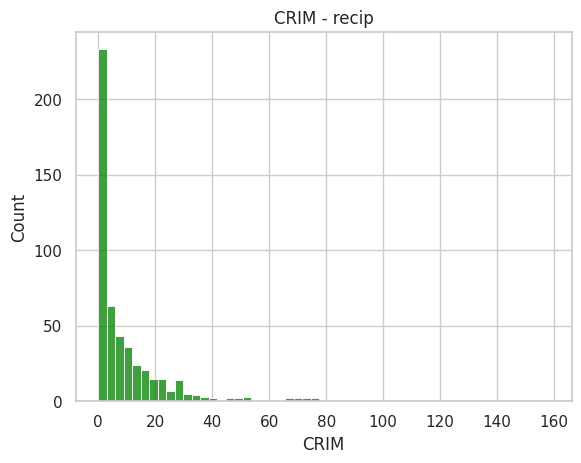

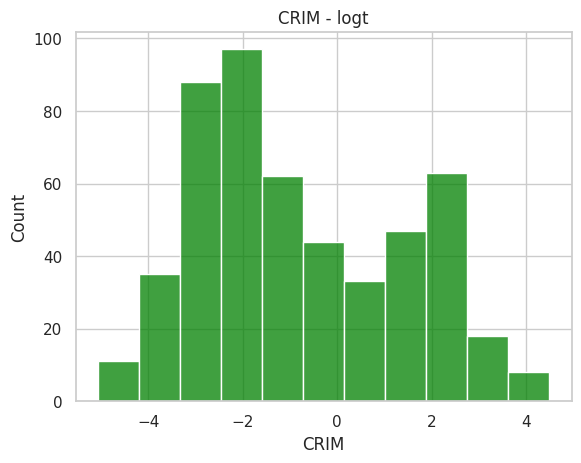

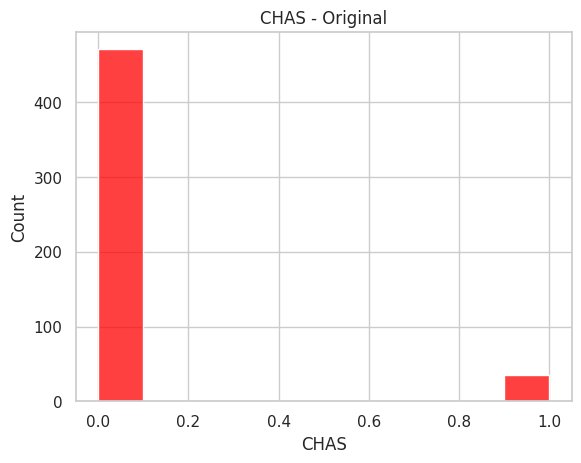

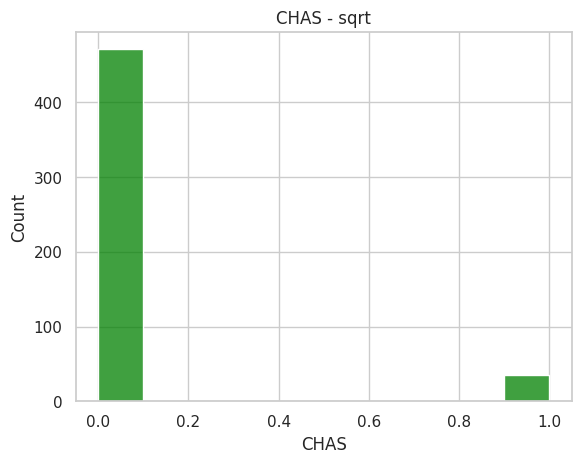

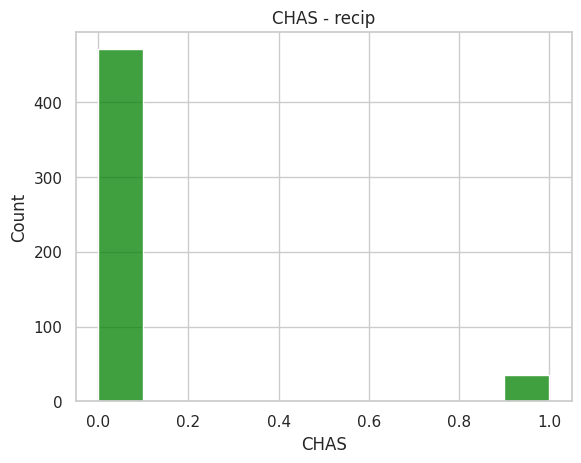

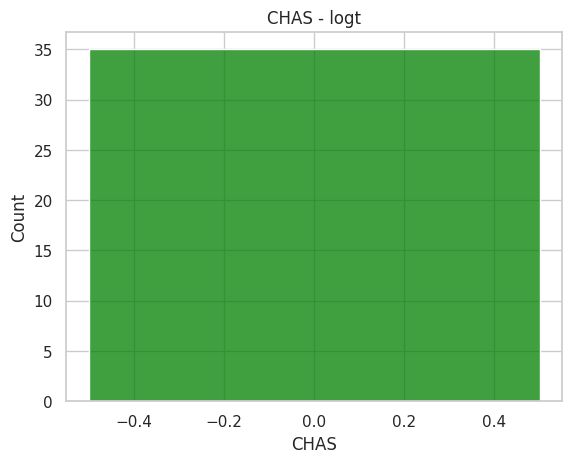

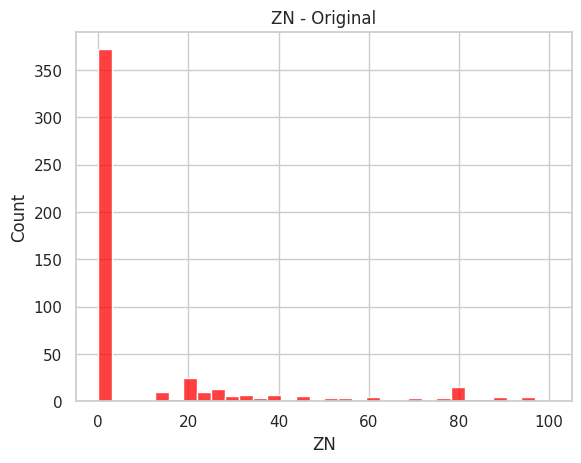

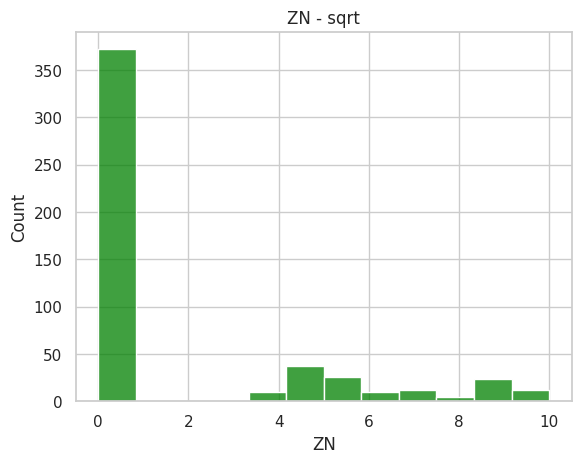

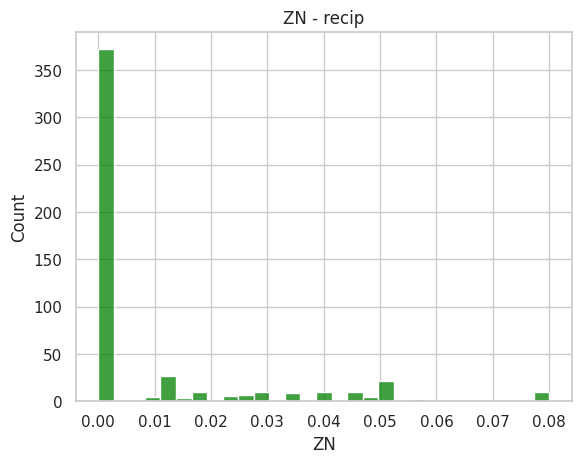

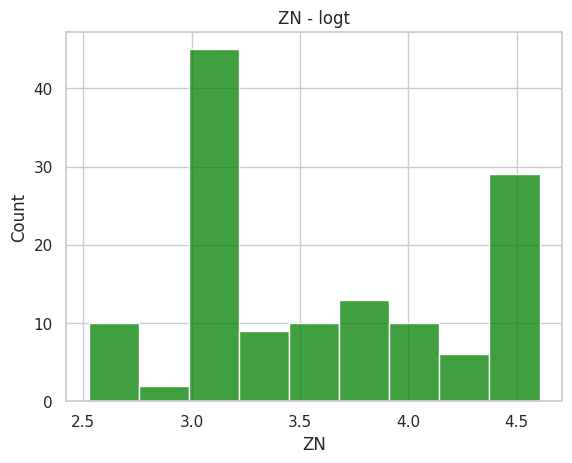

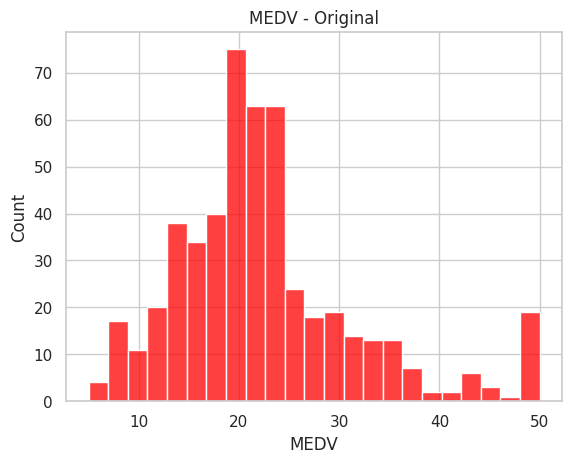

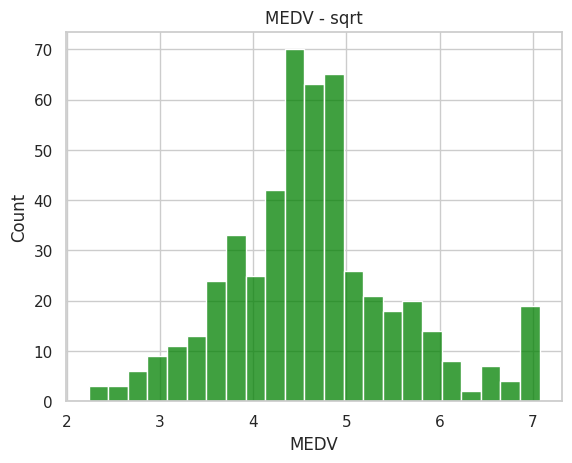

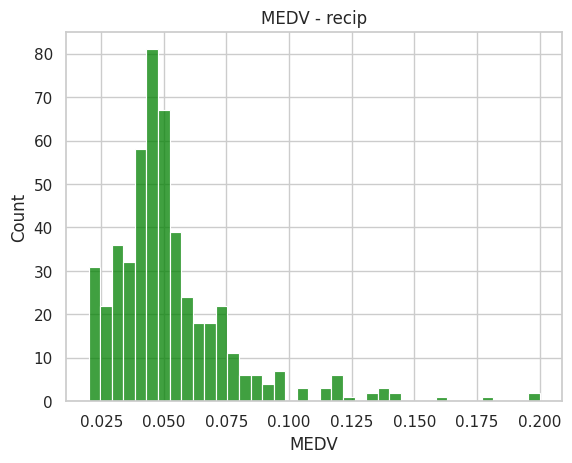

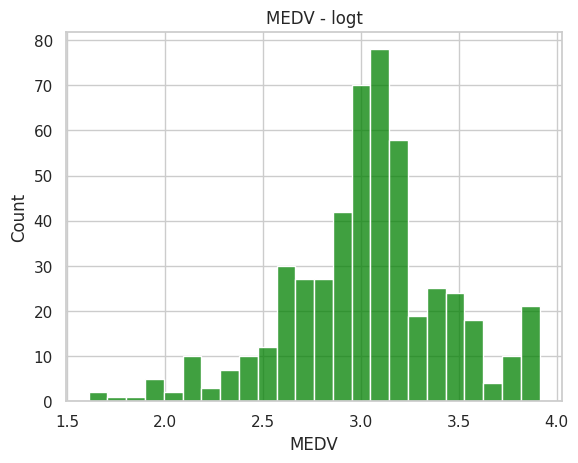

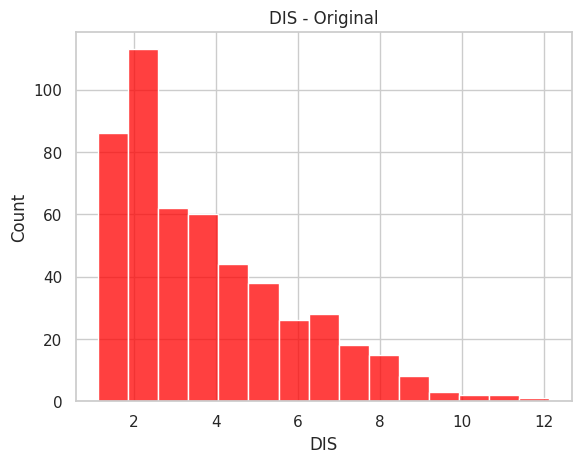

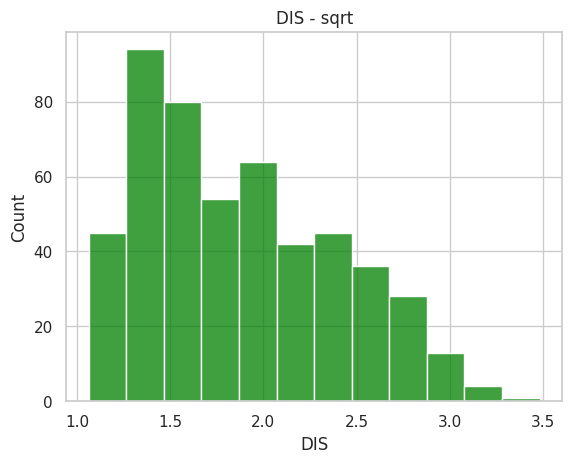

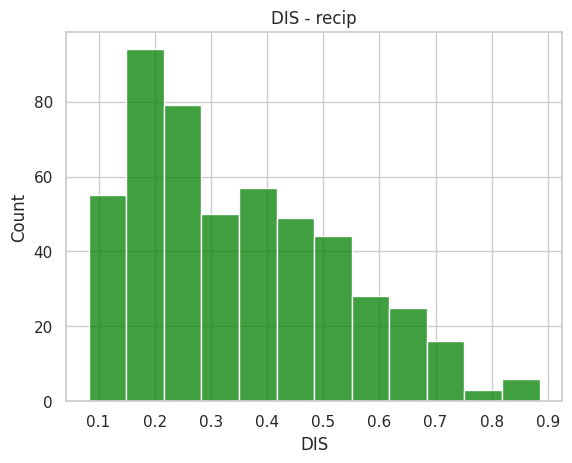

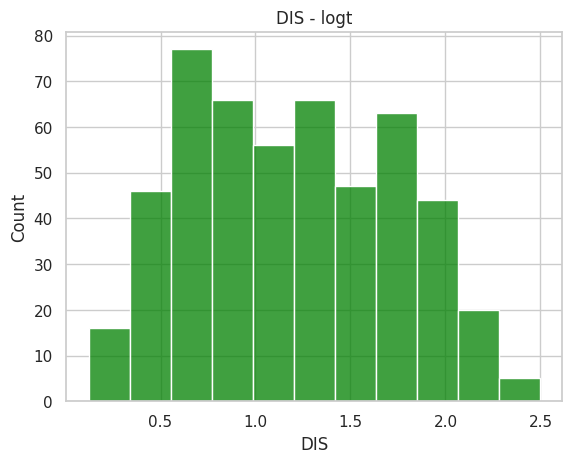

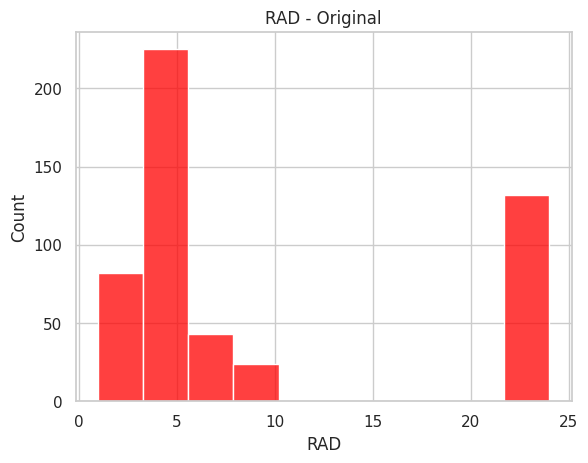

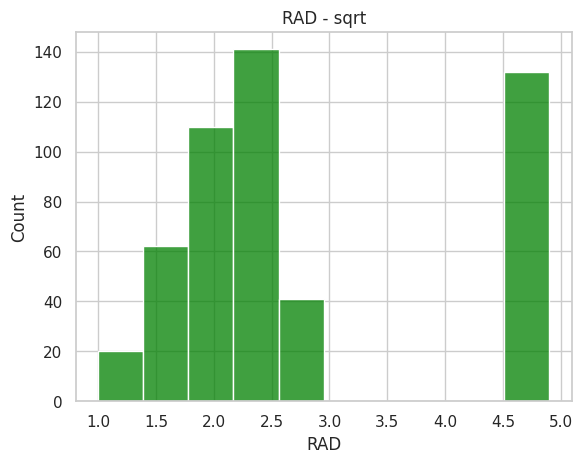

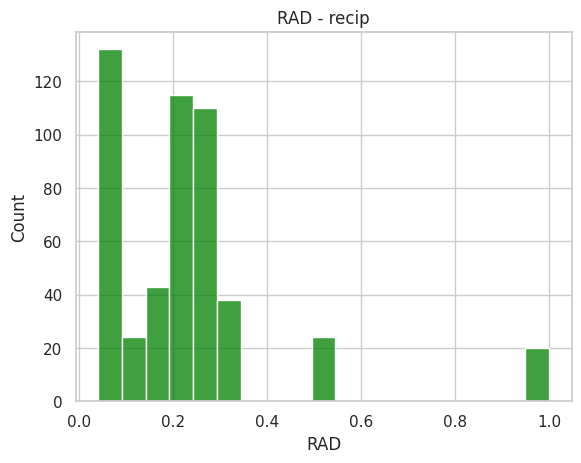

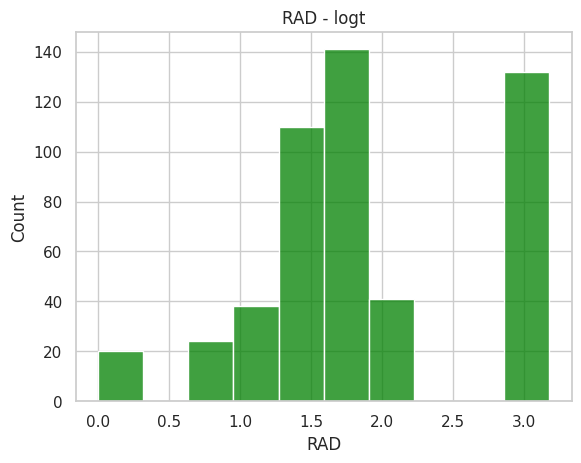

In [25]:
## Log transformation of dependent variable if skewed

def sqrt(x):
    return numpy.sqrt(x)

def recip(x):
  if x == 0:
    return 0
  else:
    return 1/x

def logt(x):
    return numpy.log(x)

transformation_fns = [sqrt,  recip, logt]

transformed_df = boston_housing_df.copy(deep=True)
for skewed_col in moderately_skewed + highly_skewed:
  # Square Root transformation
  # sqrt_resp = resp**(0.5)
  column = transformed_df[skewed_col[0]]
  seaborn.histplot(column, color="red").set_title(skewed_col[0] + " - Original")
  pyplot.show()

  for func in transformation_fns:
    new_column = column.apply(func)
    transformed_df[skewed_col[0] + "_" + func.__name__] = new_column
    seaborn.histplot(new_column, color="green").set_title(skewed_col[0] + " - " + func.__name__)
    pyplot.show()

In [31]:
# Runn skew calculations for the new columns
transformed_df_col_names = transformed_df.dtypes[transformed_df.dtypes != "object"].index
print(transformed_df_col_names)
transformed_df_skew_calculations = transformed_df[transformed_df_col_names].skew().sort_index()
print(transformed_df_skew_calculations)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'LSTAT_sqrt', 'LSTAT_recip', 'LSTAT_logt',
       'NOX_sqrt', 'NOX_recip', 'NOX_logt', 'TAX_sqrt', 'TAX_recip',
       'TAX_logt', 'AGE_sqrt', 'AGE_recip', 'AGE_logt', 'PTRATIO_sqrt',
       'PTRATIO_recip', 'PTRATIO_logt', 'CRIM_sqrt', 'CRIM_recip', 'CRIM_logt',
       'CHAS_sqrt', 'CHAS_recip', 'CHAS_logt', 'ZN_sqrt', 'ZN_recip',
       'ZN_logt', 'MEDV_sqrt', 'MEDV_recip', 'MEDV_logt', 'DIS_sqrt',
       'DIS_recip', 'DIS_logt', 'RAD_sqrt', 'RAD_recip', 'RAD_logt'],
      dtype='object')
AGE             -0.598963
AGE_logt        -1.675655
AGE_recip        5.992036
AGE_sqrt        -0.977466
CHAS             3.405904
CHAS_logt             NaN
CHAS_recip       3.405904
CHAS_sqrt        3.405904
CRIM             5.223149
CRIM_logt        0.405934
CRIM_recip       3.744584
CRIM_sqrt        2.024382
DIS              1.011781
DIS_logt         0.152730
DIS_recip        0.639725


In [ ]:
# TODO
# Feature engineering (if needed)
# Outlier detection and treatment (if needed)
# Preparing data for modeling
# Any other preprocessing steps (if needed)

## Model Building - Linear Regression

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

## Actionable Insights and Recommendations

-


___